In [99]:
import pandas as pd 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler ,LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve,roc_auc_score


from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline



%matplotlib inline



In [100]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [101]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [102]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [103]:
df.loc[df['diabetes'] == 1]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


In [104]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [107]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [108]:
df.duplicated().sum()

3854

In [109]:
df.drop_duplicates(inplace=True)

In [110]:
columns = df.columns.to_list()



for i in columns:
    print(df[i].value_counts())
    print("\n-------------------------------------------------------\n")

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

-------------------------------------------------------

80.00    4932
51.00    1566
47.00    1511
48.00    1508
53.00    1498
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: age, Length: 102, dtype: int64

-------------------------------------------------------

0    88685
1     7461
Name: hypertension, dtype: int64

-------------------------------------------------------

0    92223
1     3923
Name: heart_disease, dtype: int64

-------------------------------------------------------

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

-------------------------------------------------------

27.32    21666
23.00      103
27.12      101
24.96      100
27.80      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: 

In [111]:
## Copy of the data to perform EDA

df2 = df.copy()

In [112]:
df2['gender'] = df2['gender'].replace('Other', pd.NA)

In [113]:
df2['smoking_history'] = df2['smoking_history'].replace('No Info', pd.NA)

In [114]:
df2.isna().sum()/len(df)*100

gender                  0.018722
age                     0.000000
hypertension            0.000000
heart_disease           0.000000
smoking_history        34.205271
bmi                     0.000000
HbA1c_level             0.000000
blood_glucose_level     0.000000
diabetes                0.000000
dtype: float64

In [115]:
df2.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

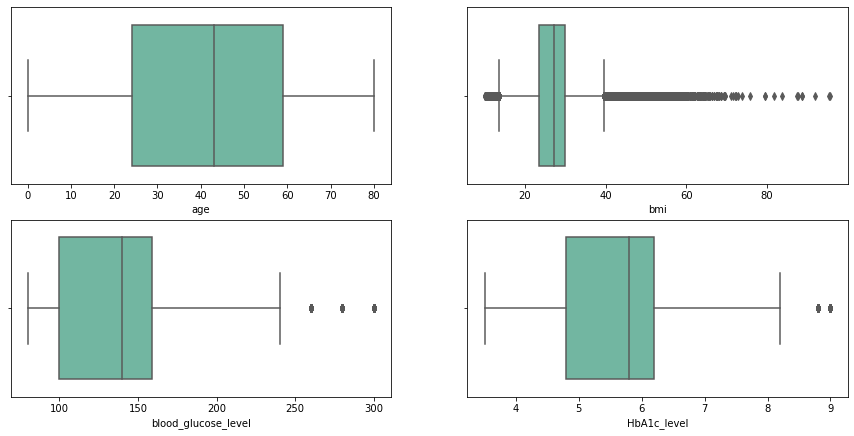

In [116]:
plt.figure(figsize = (15,15))
for i,col in enumerate(["age","bmi","blood_glucose_level","HbA1c_level"]):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df2 ,palette='Set2')
plt.show()

C:\Users\hmaze\AppData\Local\Temp\ipykernel_17188\3864239792.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),annot=True,cmap="YlGnBu")


Text(0.5, 1.0, 'correlation of feature')

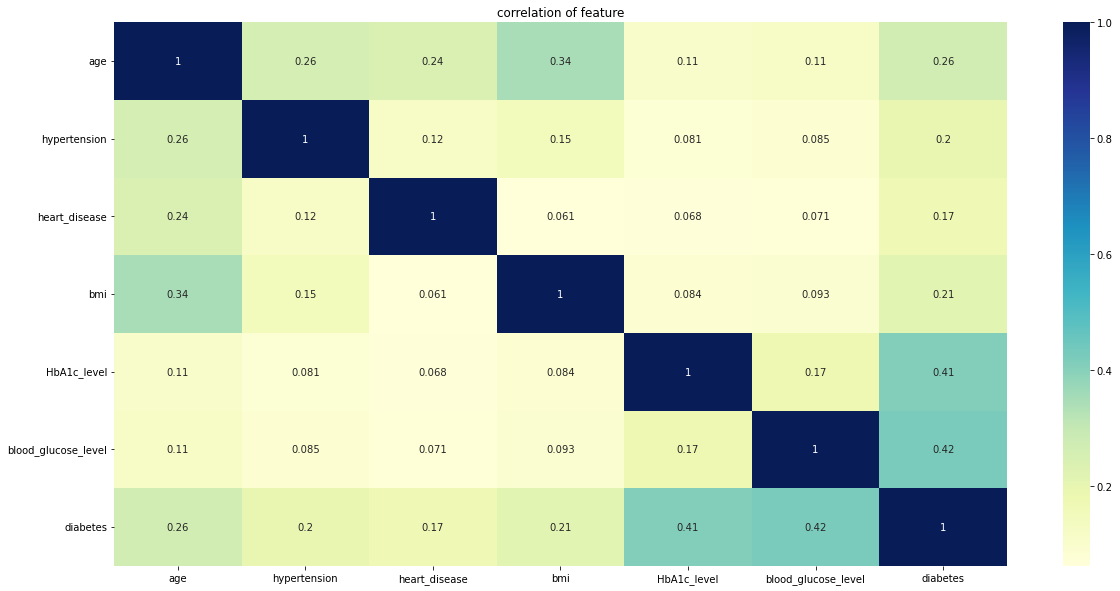

In [117]:
#using heatmap to understand correlation better in dataset data 
#Heatmap of correlation


plt.figure(figsize = (20,10))
sns.heatmap(df2.corr(),annot=True,cmap="YlGnBu")
plt.title("correlation of feature")

C:\Users\hmaze\AppData\Local\Temp\ipykernel_17188\3481987849.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.drop('diabetes', axis=1).corrwith(df2.diabetes).plot(kind='bar', grid=True, figsize=(20, 8),title="Correlation with Diabetes",color="blue")


<Axes: title={'center': 'Correlation with Diabetes'}>

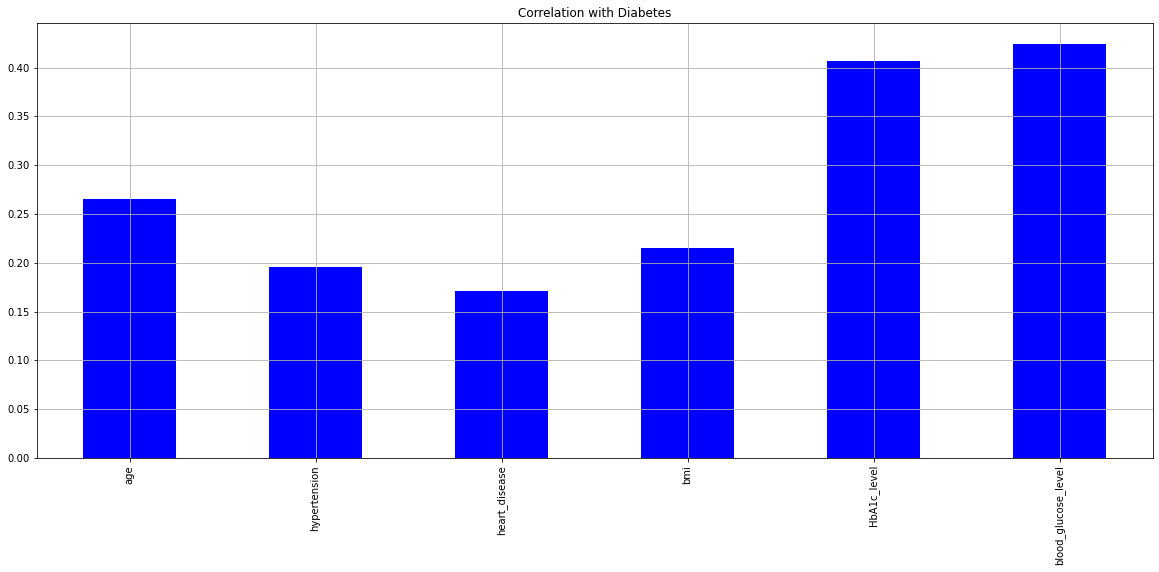

In [118]:
df2.drop('diabetes', axis=1).corrwith(df2.diabetes).plot(kind='bar', grid=True, figsize=(20, 8),title="Correlation with Diabetes",color="blue")

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

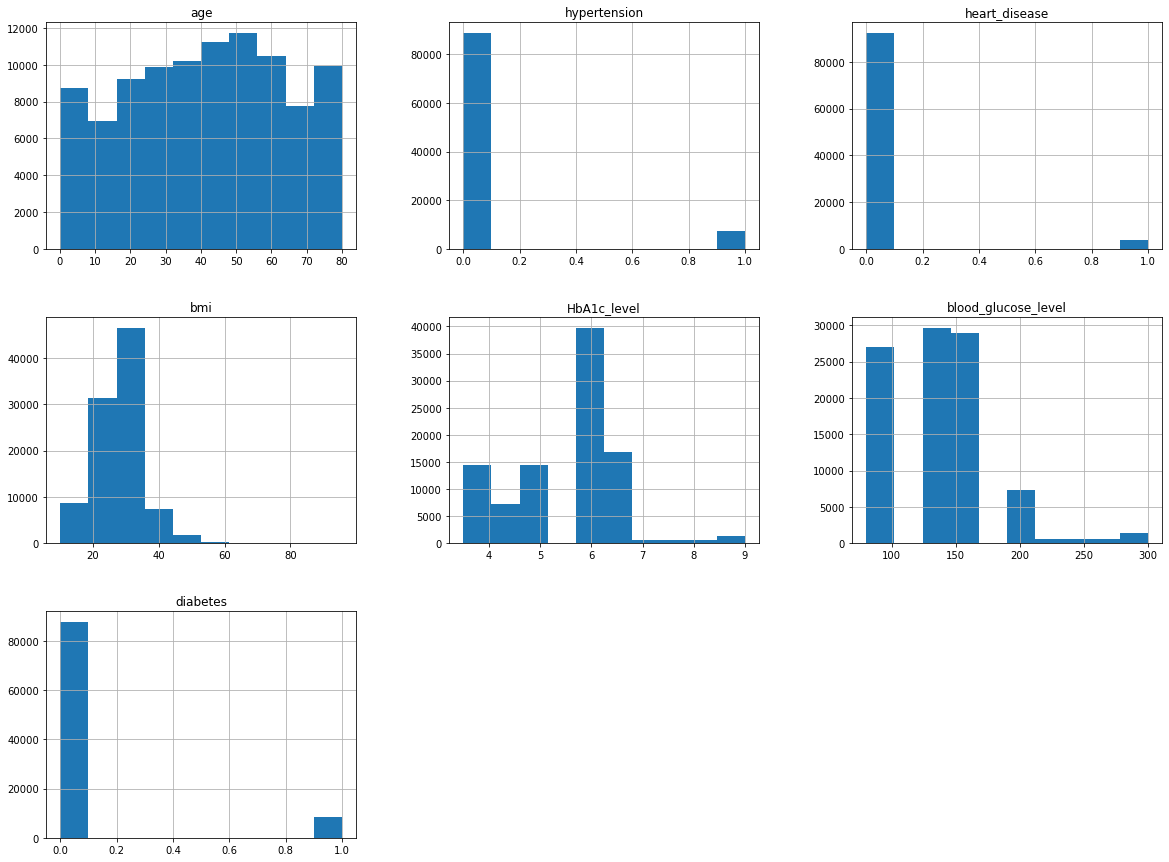

In [119]:
df2.hist(figsize=(20,15))

1     8482
0    87664
Name: diabetes, dtype: int64
1     8.822000%
0    91.178000%
Name: diabetes, dtype: object



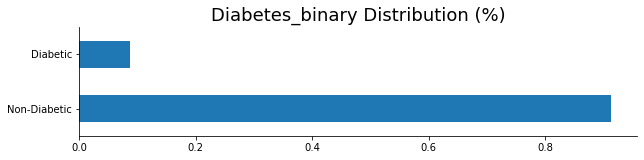

In [120]:
print(df2['diabetes'].value_counts(ascending=True))
print(df2['diabetes'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))
print()
df2['diabetes'].value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);

<Axes: xlabel='diabetes', ylabel='count'>

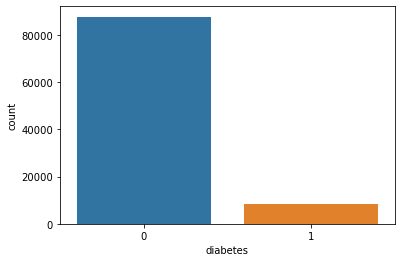

In [121]:
sns.countplot(data=df2,x="diabetes")

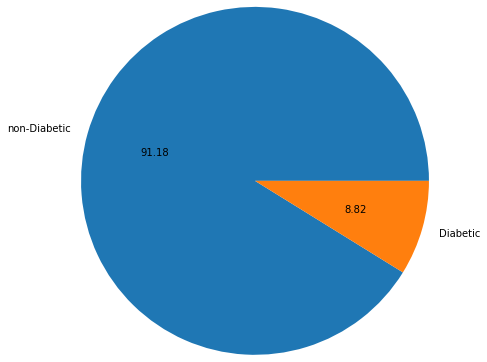

In [122]:
labels=["non-Diabetic","Diabetic"]

plt.pie(df2["diabetes"].value_counts() , labels =labels ,autopct='%.02f',radius=2 );

In [123]:
colors = ['#be4d25','#2596be']
def analyse_cat(var):
    (df2.groupby('diabetes')[var]
     .value_counts(1)
     .unstack()
     .iloc[:,::-1]
     .plot(kind='barh',stacked=True,figsize=(10, 2), color=colors, alpha=1)
     .spines[['top', 'right']].set_visible(False))
    plt.legend(['Yes', "No"],bbox_to_anchor=(1, 1, 0, 0),shadow=False, frameon=False)
    plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic'])
    plt.tight_layout()
    plt.title(var, fontsize=18)
    plt.show()

In [124]:
# grouped variables
target = 'diabetes'
bool_vars = (df2.nunique()[df2.nunique() == 2]
                .index
                .drop(labels='diabetes'))
num_vars = [var for var in df2.columns if var not in bool_vars and var != 'Diabetes_binary']

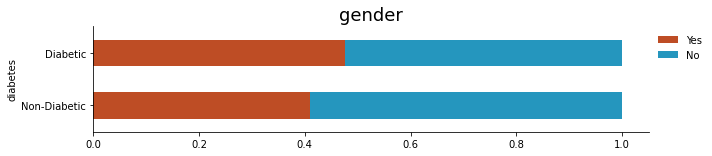

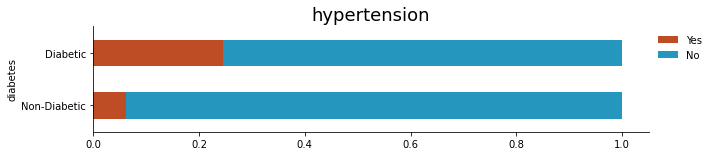

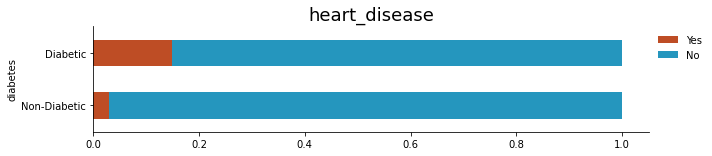

In [125]:
for var in bool_vars:
    analyse_cat(var)

1     7461
0    88685
Name: hypertension, dtype: int64
1     7.760073%
0    92.239927%
Name: hypertension, dtype: object



([<matplotlib.axis.YTick at 0x1fcabaa87c0>,
 [Text(0, 0, 'No'), Text(0, 1, 'Yes')])

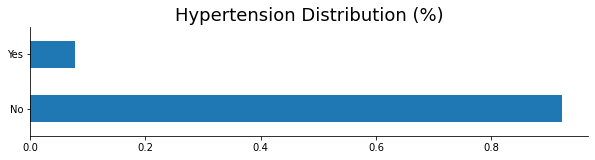

In [126]:
print(df2['hypertension'].value_counts(ascending=True))
print(df2['hypertension'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))
print()
df['hypertension'].value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False)
plt.title('Hypertension Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['No', 'Yes'])

1     3923
0    92223
Name: heart_disease, dtype: int64
1     4.080253%
0    95.919747%
Name: heart_disease, dtype: object



([<matplotlib.axis.YTick at 0x1fcabd40490>,
 [Text(0, 0, 'No'), Text(0, 1, 'Yes')])

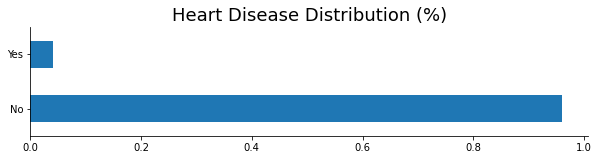

In [127]:
print(df2['heart_disease'].value_counts(ascending=True))
print(df2['heart_disease'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))
print()
df['heart_disease'].value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False)
plt.title('Heart Disease Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['No', 'Yes'])

In [128]:
df2["heart_disease"].value_counts()

0    92223
1     3923
Name: heart_disease, dtype: int64

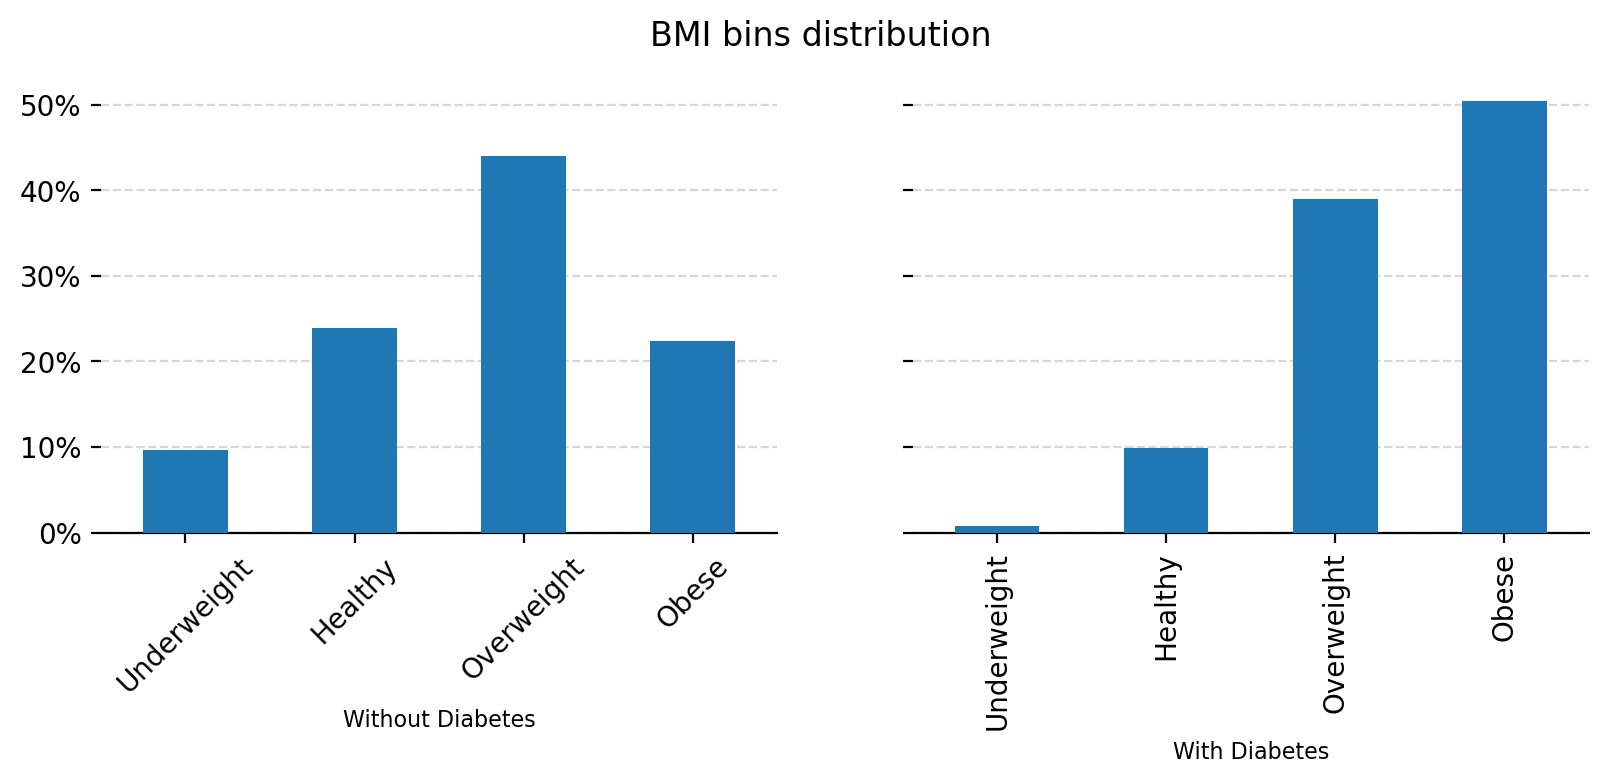

In [129]:
# create new binned column
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Healthy', 'Overweight', 'Obese']

df2['BMI_bins'] = pd.cut(df2['bmi'], bins=bins, labels=labels)

ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('BMI bins distribution')

(df2[df2['diabetes']==False]['BMI_bins']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.set_xticklabels(labels)
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

(df2[df2['diabetes']==True]['BMI_bins']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.set_xticklabels(labels)
ax2.grid(axis='y', linestyle='--', alpha=.5)

In [130]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

Male      39967
Female    56161
Name: gender, dtype: int64
Male      41.576856%
Female    58.423144%
Name: gender, dtype: object



([<matplotlib.axis.YTick at 0x1fcac54f430>,
 [Text(0, 0, 'Female'), Text(0, 1, 'Male')])

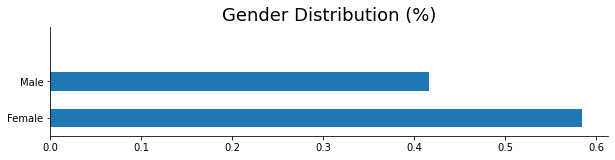

In [131]:
print(df2['gender'].value_counts(ascending=True))
print(df2['gender'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))
print()
df['gender'].value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False)
plt.title('Gender Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Female', 'Male'])

In [132]:
df2

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,BMI_bins
0,Female,80.0,0,1,never,25.19,6.6,140,0,Overweight
1,Female,54.0,0,0,<NA>,27.32,6.6,80,0,Overweight
2,Male,28.0,0,0,never,27.32,5.7,158,0,Overweight
3,Female,36.0,0,0,current,23.45,5.0,155,0,Healthy
4,Male,76.0,1,1,current,20.14,4.8,155,0,Healthy
...,...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,<NA>,24.60,4.8,145,0,Healthy
99996,Female,2.0,0,0,<NA>,17.37,6.5,100,0,Underweight
99997,Male,66.0,0,0,former,27.83,5.7,155,0,Overweight
99998,Female,24.0,0,0,never,35.42,4.0,100,0,Obese


<Axes: xlabel='gender', ylabel='count'>

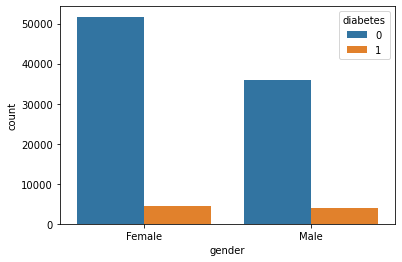

In [133]:
sns.countplot(data=df2,x='gender' ,hue='diabetes')

<Axes: xlabel='smoking_history', ylabel='count'>

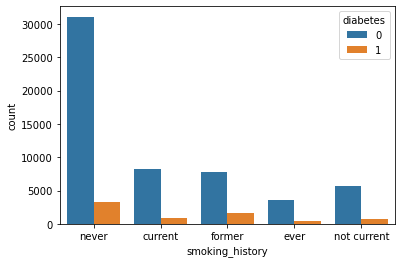

In [134]:
sns.countplot(data=df2,x='smoking_history' ,hue='diabetes')

In [135]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [136]:

# Assuming 'data' is your DataFrame and 'age' is the column you want to bin
# Define the bin edges and labels
bin_edges = [15, 25, 40, 60, 80, 100]
bin_labels = ['15-25', '26-40', '41-60', '61-80', '81-100']

# Apply pd.cut to create bins
df2['age_bins'] = pd.cut(df2['age'], bins=bin_edges, labels=bin_labels, include_lowest=True)


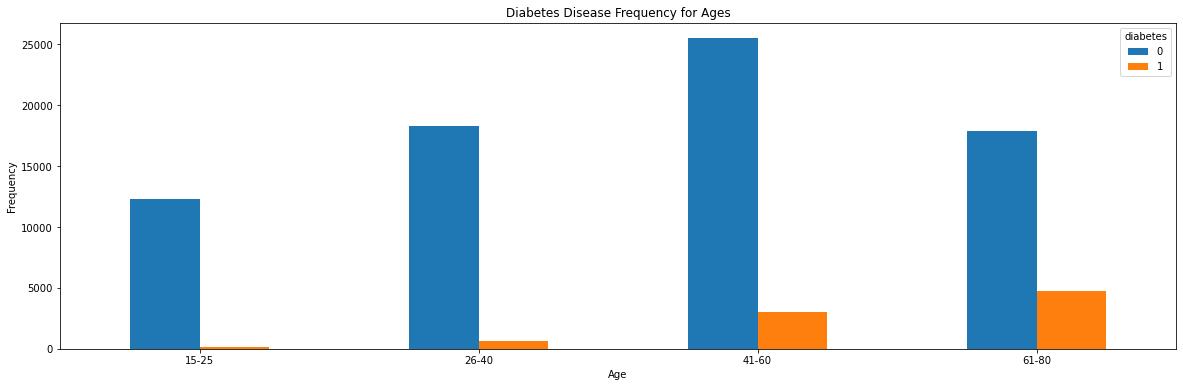

In [137]:
pd.crosstab(df2.age_bins,df2.diabetes).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


In [138]:
df2.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'BMI_bins',
       'age_bins'],
      dtype='object')

In [139]:

# Assuming 'data' is your DataFrame and 'age' is the column you want to bin
# Define the bin edges and labels
bin_edges = [0, 5.7, 6.4, np.inf]
bin_labels = ['0-5.7', '5.8-6.4', 'more than 6.5'] 

# Apply pd.cut to create bins
df2['HbA1c_level_bins'] = pd.cut(df2['HbA1c_level'], bins=bin_edges, labels=bin_labels, include_lowest=True)


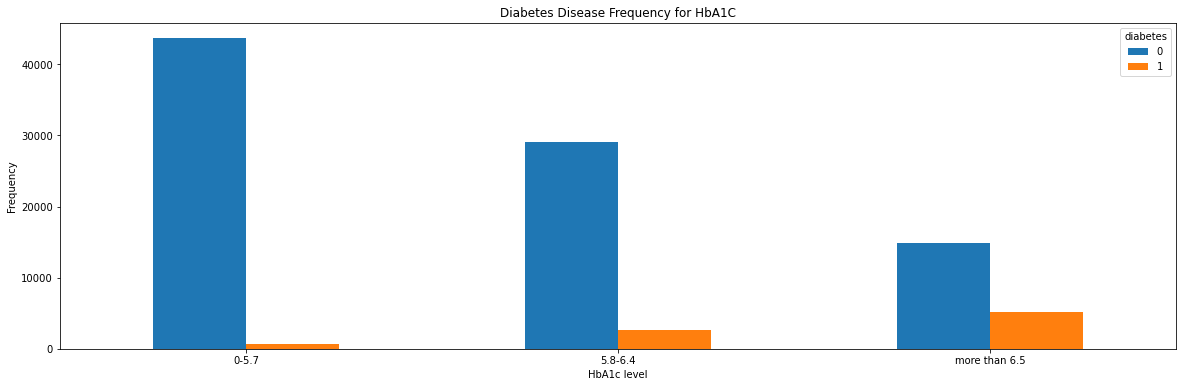

In [140]:
pd.crosstab(df2.HbA1c_level_bins,df2.diabetes).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for HbA1C')
plt.xlabel('HbA1c level')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


In [141]:
list(np.arange(df2["blood_glucose_level"].min(),df2["blood_glucose_level"].max(),50))

[80, 130, 180, 230, 280]

In [142]:

# Assuming 'data' is your DataFrame and 'age' is the column you want to bin
# Define the bin edges and labels
bin_edges = [170,200 , 230,300,np.inf]
bin_labels = ['170-200', '201-230','231-300','more than 300'] 

# Apply pd.cut to create bins
df2["blood_glucose_level_bins"] = pd.cut(df2['blood_glucose_level'], bins=bin_edges, labels=bin_labels, include_lowest=True)


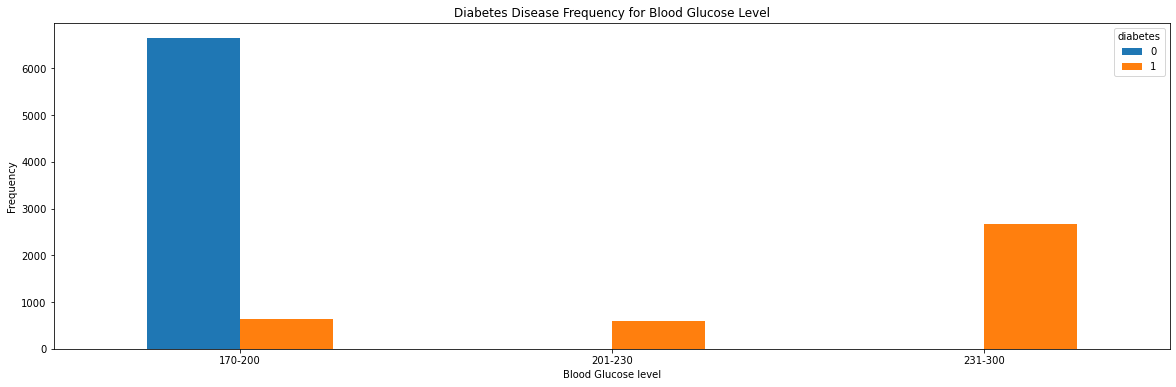

In [143]:
pd.crosstab(df2.blood_glucose_level_bins,df2.diabetes).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Blood Glucose Level')
plt.xlabel('Blood Glucose level')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


## Preprocessing

In [144]:
df.shape

(96146, 9)

In [145]:
df['gender'] = df['gender'].replace('Other', pd.NA)

In [146]:
df['smoking_history'] = df['smoking_history'].replace('No Info', pd.NA)

In [147]:
df['smoking_history'].mode()[0]

'never'

In [148]:
df['gender'].mode()[0]

'Female'

In [149]:
df['smoking_history'].fillna(df['smoking_history'].mode()[0],inplace=True)
df['gender'].fillna(df['gender'].mode()[0],inplace=True)

df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [150]:
df['gender'] = df['gender'].replace('Female',0)
df['gender'] = df['gender'].replace('Male', 1)


In [151]:
features = ['smoking_history']

df= pd.get_dummies(data=df,columns=features)
df


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,0,0,0,1,0
1,0,54.0,0,0,27.32,6.6,80,0,0,0,0,1,0
2,1,28.0,0,0,27.32,5.7,158,0,0,0,0,1,0
3,0,36.0,0,0,23.45,5.0,155,0,1,0,0,0,0
4,1,76.0,1,1,20.14,4.8,155,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,24.60,4.8,145,0,0,0,0,1,0
99996,0,2.0,0,0,17.37,6.5,100,0,0,0,0,1,0
99997,1,66.0,0,0,27.83,5.7,155,0,0,0,1,0,0
99998,0,24.0,0,0,35.42,4.0,100,0,0,0,0,1,0


In [152]:

columns_to_scale = ['age', 'bmi', 'HbA1c_level',
       'blood_glucose_level']



df[columns_to_scale] = RobustScaler().fit_transform(df[columns_to_scale])

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       96146 non-null  int64  
 1   age                          96146 non-null  float64
 2   hypertension                 96146 non-null  int64  
 3   heart_disease                96146 non-null  int64  
 4   bmi                          96146 non-null  float64
 5   HbA1c_level                  96146 non-null  float64
 6   blood_glucose_level          96146 non-null  float64
 7   diabetes                     96146 non-null  int64  
 8   smoking_history_current      96146 non-null  uint8  
 9   smoking_history_ever         96146 non-null  uint8  
 10  smoking_history_former       96146 non-null  uint8  
 11  smoking_history_never        96146 non-null  uint8  
 12  smoking_history_not current  96146 non-null  uint8  
dtypes: float64(4), i

In [154]:
df["HbA1c_level"].dtype == float

True

In [155]:
for col in df.columns.to_list():
    if df[col].dtype == bool:
        df[col] = df[col].astype(int)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       96146 non-null  int64  
 1   age                          96146 non-null  float64
 2   hypertension                 96146 non-null  int64  
 3   heart_disease                96146 non-null  int64  
 4   bmi                          96146 non-null  float64
 5   HbA1c_level                  96146 non-null  float64
 6   blood_glucose_level          96146 non-null  float64
 7   diabetes                     96146 non-null  int64  
 8   smoking_history_current      96146 non-null  uint8  
 9   smoking_history_ever         96146 non-null  uint8  
 10  smoking_history_former       96146 non-null  uint8  
 11  smoking_history_never        96146 non-null  uint8  
 12  smoking_history_not current  96146 non-null  uint8  
dtypes: float64(4), i

In [157]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,1.057143,0,1,-0.329721,0.571429,0.000000,0,0,0,0,1,0
1,0,0.314286,0,0,0.000000,0.571429,-1.016949,0,0,0,0,1,0
2,1,-0.428571,0,0,0.000000,-0.071429,0.305085,0,0,0,0,1,0
3,0,-0.200000,0,0,-0.599071,-0.571429,0.254237,0,1,0,0,0,0
4,1,0.942857,1,1,-1.111455,-0.714286,0.254237,0,1,0,0,0,0


In [158]:
df.diabetes.value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

In [159]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [160]:
x = df.drop('diabetes',axis=1)
y = df['diabetes']

In [161]:
oversample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=5),random_state=42)

In [162]:
x_res, y_res = oversample.fit_resample(x, y)

In [163]:
X_train , X_test , Y_train , Y_test = train_test_split(x_res,y_res, test_size=0.33 , random_state=42)

In [164]:
x_res.shape

(166563, 12)

In [165]:
y_res.shape

(166563,)

In [168]:
class ClfSwitcher(BaseEstimator):
    def __init__(self, estimator = None):
        self.estimator = estimator

    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self

    def predict(self, X, y=None):
        return self.estimator.predict(X)
    


# Create a pipeline
steps = [('clf', ClfSwitcher())]
pipeline = Pipeline(steps)
parameters = [
    {
        'clf__estimator': [DecisionTreeClassifier()],
        'clf__estimator__max_depth': np.arange(5,16),
        'clf__estimator__min_samples_leaf': np.arange(5,11)
    },
    {
        'clf__estimator': [KNeighborsClassifier()],
        'clf__estimator__n_neighbors':np.arange(5,16)
        
    },
    {
        'clf__estimator': [RandomForestClassifier()],
        'clf__estimator__max_depth': np.arange(5,21),
        'clf__estimator__n_estimators': np.arange(5,21)
    }

   
]

pipeline


Pipeline(steps=[('clf', ClfSwitcher())])

In [169]:
gscv = GridSearchCV(pipeline,cv=5,param_grid=parameters,scoring="accuracy")
print('training model')
gscv.fit(X_train, Y_train)

training model


GridSearchCV(cv=5, estimator=Pipeline(steps=[('clf', ClfSwitcher())]),
             param_grid=[{'clf__estimator': [DecisionTreeClassifier()],
                          'clf__estimator__max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                          'clf__estimator__min_samples_leaf': array([ 5,  6,  7,  8,  9, 10])},
                         {'clf__estimator': [KNeighborsClassifier()],
                          'clf__estimator__n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
                         {'clf__estimator': [RandomForestClassifier(max_depth=20,
                                                                    n_estimators=20)],
                          'clf__estimator__max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                          'clf__estimator__n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])}],
             scoring='accuracy')

In [170]:
# lets check out the results 
print('best model: \n\n', gscv.best_estimator_)
print('\ntest set accuracy: ',gscv.score(X_test, Y_test))

best model: 

 Pipeline(steps=[('clf',
                 ClfSwitcher(estimator=RandomForestClassifier(max_depth=20,
                                                              n_estimators=20)))])

test set accuracy:  0.977495178837827


In [171]:
y_pred= gscv.predict(X_test)

In [172]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     28839
           1       0.97      0.98      0.98     26127

    accuracy                           0.98     54966
   macro avg       0.98      0.98      0.98     54966
weighted avg       0.98      0.98      0.98     54966



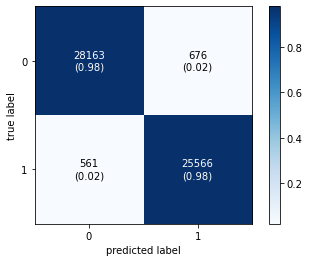

In [173]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [174]:
gscv.best_estimator_

Pipeline(steps=[('clf',
                 ClfSwitcher(estimator=RandomForestClassifier(max_depth=20,
                                                              n_estimators=20)))])

In [175]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_pred)
auc = roc_auc_score(Y_test, y_pred)

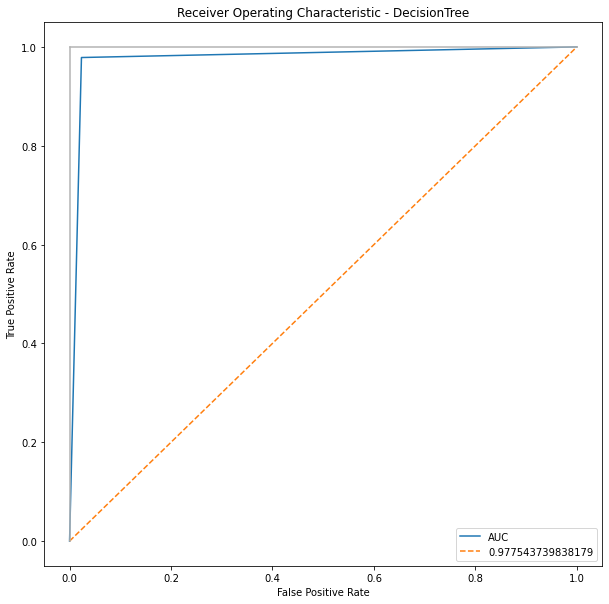

In [176]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(["AUC", str(auc)], loc=0)
plt.show()
